In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = 'modcloth'

df = pd.read_csv('df_'+dataset+'.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.dropna(subset=['user_attr'])
df = df.drop(["item_id", "size", "model_attr", "brand", "split"], axis=1)
display(df)

,user_id,rating,timestamp,fit,user_attr,category,year
0,Alex,4,2010-01-21 08:00:00+00:00,NaN,Small,Dresses,2012
2,Robyn,4,2010-01-29 08:00:00+00:00,NaN,Small,Dresses,2012
4,tasha,4,2010-02-18 08:00:00+00:00,NaN,Small,Dresses,2012
6,Kim,2,2010-02-26 08:00:00+00:00,NaN,Small,Dresses,2012
8,Elissa,4,2010-04-06 07:00:00+00:00,NaN,Small,Dresses,2012
...,...,...,...,...,...,...,...
99888,BernMarie,5,2019-06-26 21:15:13.165000+00:00,Just right,Large,Dresses,2017
99889,Sam,4,2019-06-26 23:22:29.633000+00:00,Slightly small,Small,Bottoms,2014
99890,Janice,5,2019-06-27 00:20:52.125000+00:00,Just right,Small,Dresses,2013
99891,amy,3,2019-06-27 15:45:06.250000+00:00,Slightly small,Small,Outerwear,2016


In [16]:
def stats(df):
    uy_df = df[['year', 'user_attr']].groupby(['year', 'user_attr']).size().reset_index()
    uy_df.columns = ["year", "user_attr", "count"]
    # display(uy_df)
    plt.figure(figsize=(10, 7))
    sns.barplot(x='year', hue='user_attr', y='count', data=uy_df)
    uy = uy_df.groupby(['year', 'user_attr']).agg({'count': 'sum'})
    uy_prop = uy.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
    uy_prop.columns = ['year', 'user_attr', 'percent']
    plt.figure(figsize=(10, 7))
    sns.barplot(x='year', hue='user_attr', y='percent', data=uy_prop)
    rat_df = df[['year', 'user_attr', 'rating']].groupby(['year', 'user_attr']).mean().reset_index()
    plt.figure(figsize=(10, 7))
    sns.barplot(x='year', hue='user_attr', y='rating', data=rat_df)

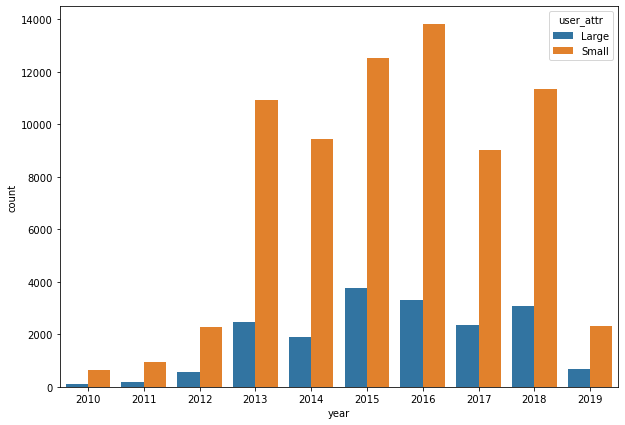

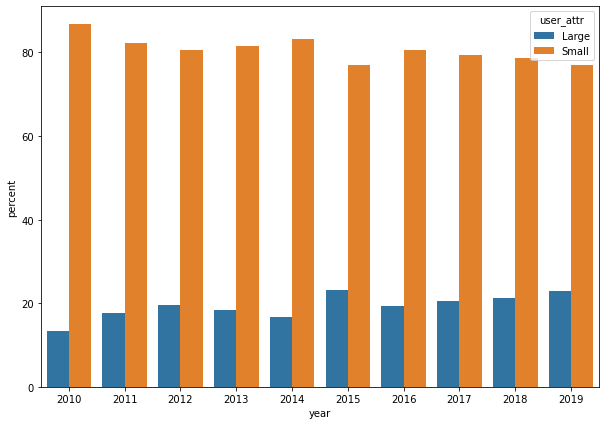

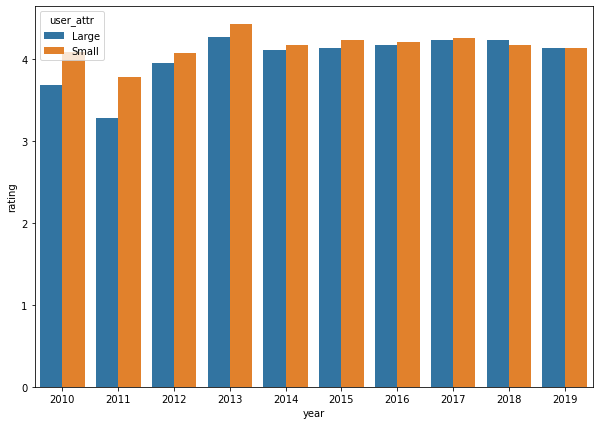

In [17]:
stats(df)

['Dresses' 'Outerwear' 'Tops' 'Bottoms']


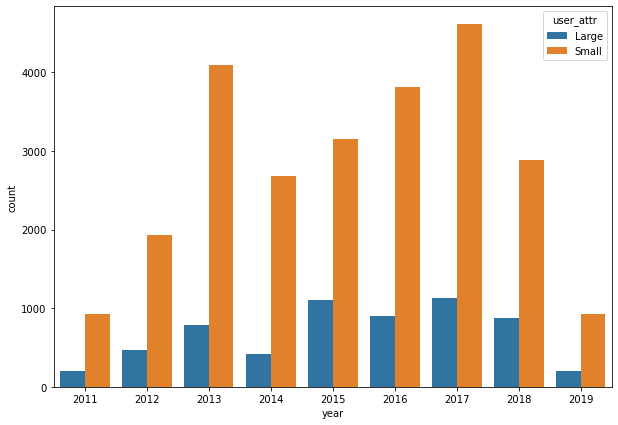

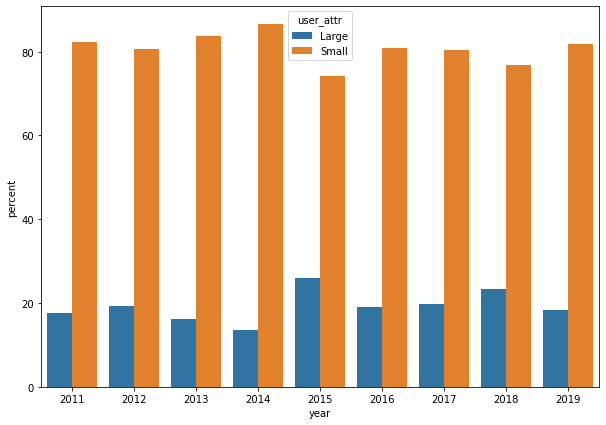

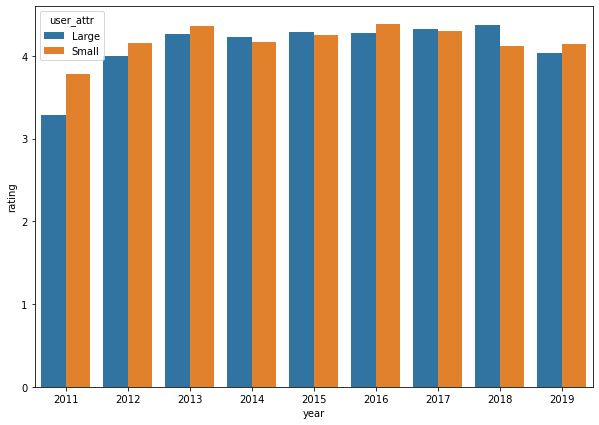

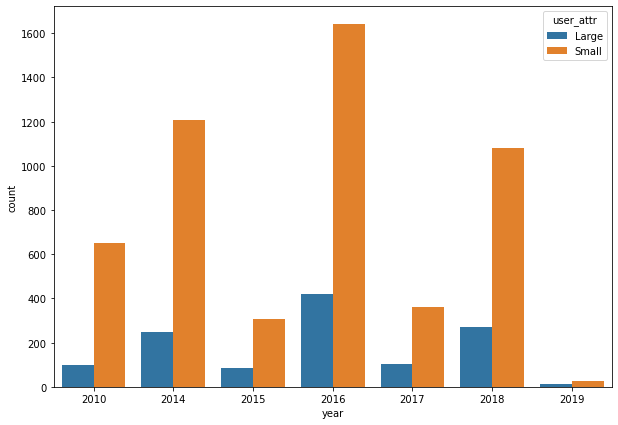

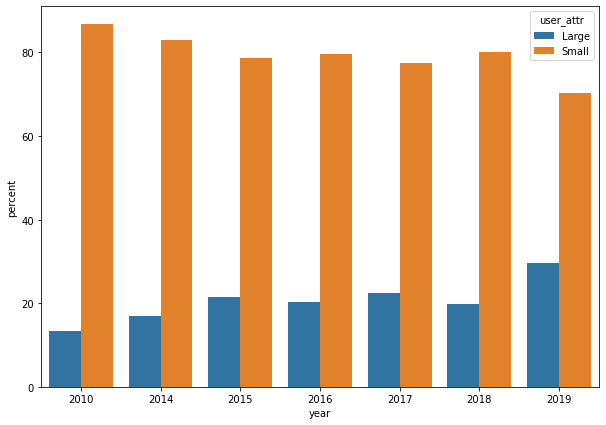

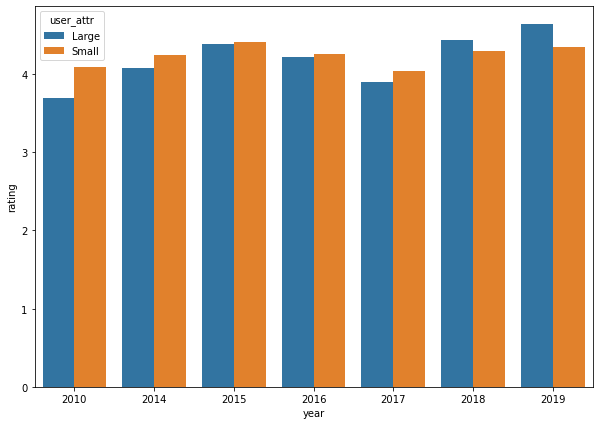

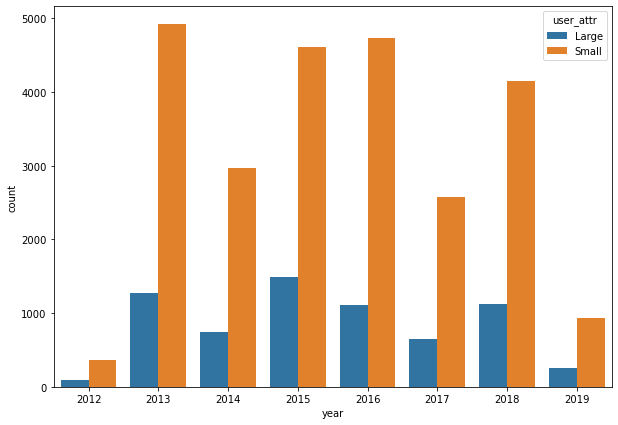

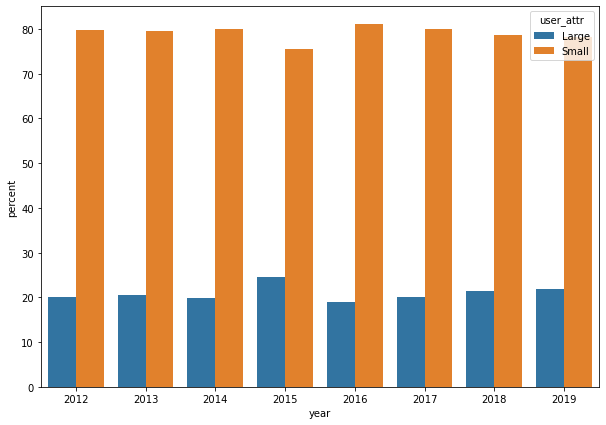

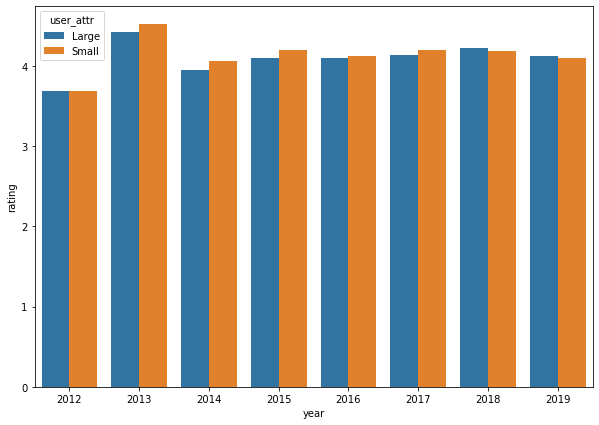

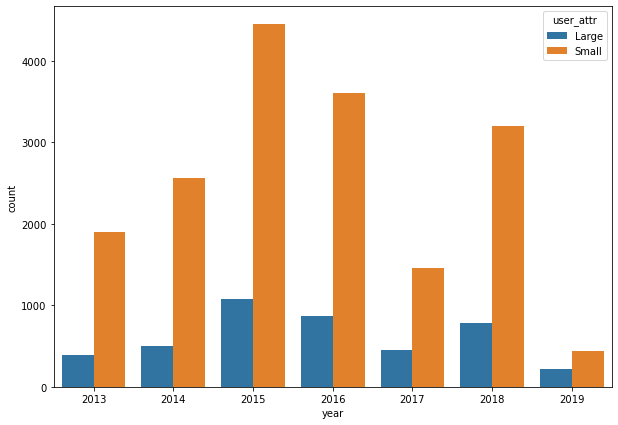

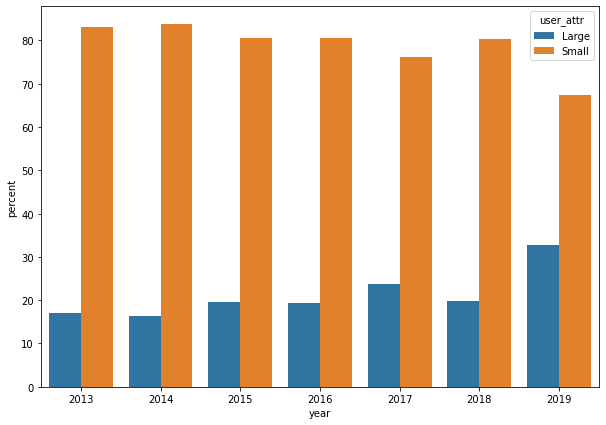

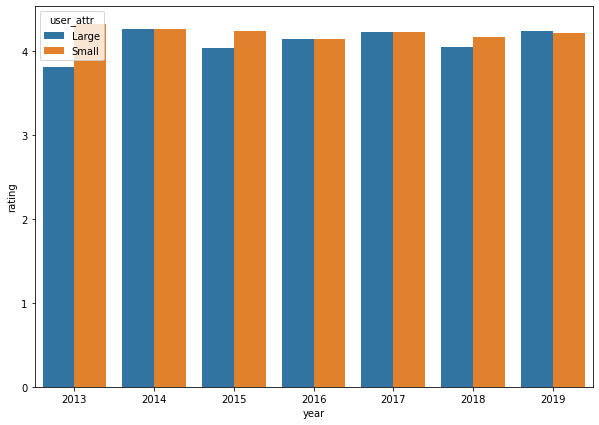

In [19]:
print(df.category.unique())
for cat in df.category.unique():
    temp_df = df[df.category == cat]
    stats(temp_df)